In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import fft
from numpy import abs, linspace
from scipy.signal import welch
from sklearn.preprocessing import MinMaxScaler
import os
from attenuation import attenuation
%matplotlib inline

In [3]:
ref = pd.read_csv('Sinais/referencias.csv')
am = pd.read_csv('Sinais/amostras.csv')


In [5]:
data = pd.DataFrame(columns = ['Featue %i'%(i+1) for i in range(9)])
data

,Featue 1,Featue 2,Featue 3,Featue 4,Featue 5,Featue 6,Featue 7,Featue 8,Featue 9


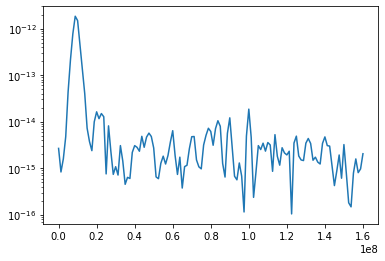

In [46]:
fs = 1/3.125000e-09
freq = 10e4
N = 16000
signal = am.loc[0][7700:8100]
freqs,psd = welch(signal,fs)
plt.semilogy(freqs,psd)

In [ ]:
lF = 0
uF = int(len(f)/4)
mask = np.logical_and( freqs >= lF, freqs <= uF )
avgValue = psd[ mask ].mean()
avgValue

In [14]:
referencia = ref.loc[0][7750:8000]

In [28]:
amostra = am.loc[0][7750:8100]

In [ ]:
at = attenuation(amostra,referencia,dataType='rf')

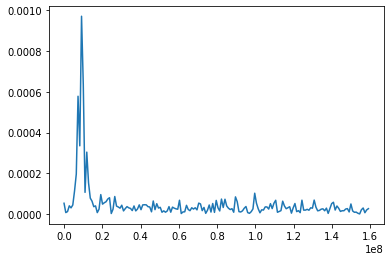

In [49]:
fourierTransform = fft(amostra)/len(amostra)  
fourierTransform = fourierTransform[range(int(len(amostra)/2))]
tpCount     = len(amostra)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/fs
frequencies = values/timePeriod
plt.plot(frequencies,abs(fourierTransform))

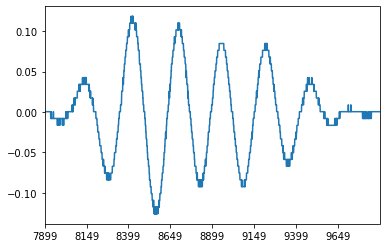

In [62]:
am.loc[3][7900:9900].plot()